Read the list of abstracts and generate a time series plot.
# Import

In [1]:
import re
import os
import matplotlib.pyplot as plt
import numpy as np
import time
from time import mktime
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib as mpl
from matplotlib import rc, rcParams
from collections import Counter

# Read info from the abstract list

In [2]:
abstractfile = '../data/abstracts/abstractslist20160531.txt'
figname = os.path.basename(abstractfile)[:-4]
print(figname)

abstractslist20160531


Extract year from file name using regex

In [3]:
match = re.search(r'\d{4}', abstractfile)
year = match.group()
print("Working on year %s" %(year))

Working on year 2016


We create two empty lists, the first contains the extact dates of the abstracts, the second contains the dates but at 00:00. The second one is used to count the days with the highest number of abstracts.

In [4]:
time4plot = []
time4plot2 = []

In [5]:
with open(abstractfile, 'r') as f:
    for lines in f:
        match = re.search(r'\d{4}-\d{2}-\d{2}_\d{2}:\d{2}:\d{2}', lines)
        if match:
            abstractdate = match.group()
            timeseconds = time.strptime(abstractdate, "%Y-%m-%d_%H:%M:%S")
            timeseconds2 = time.strptime(abstractdate[:10], "%Y-%m-%d")
            time4plot.append(datetime.fromtimestamp(mktime(timeseconds)))
            time4plot2.append(datetime.fromtimestamp(mktime(timeseconds2)))

Count the day with the most abstracts

In [6]:
abstract_count = Counter(time4plot2)
day_mostabstracts = abstract_count.most_common(1)[0][0].strftime("%B %d, %Y")
print("Day with most abstracts: %s" %(day_mostabstracts))

Day with most abstracts: January 30, 2016


# Plot

Specify where we want the xticks to be located.

In [7]:
months = mdates.MonthLocator()  # every month
monthsFmt = mdates.DateFormatter('%B')
days = mdates.DayLocator()  # every month

Indicate the main deadlines.

In [8]:
announcement2 = datetime(2015, 11, 16, 12, 0, 0)
announcement3 = datetime(2016, 1, 6, 12, 0, 0)

deadline_grants = datetime(2016, 1, 24, 0, 0, 0)
deadline_grantsend = datetime(2016, 1, 25, 0, 0, 0)

deadline_abstract = datetime(2016, 1, 30, 0, 0, 0)
deadline_abstractend = datetime(2016, 1, 31, 0, 0, 0)

deadline_abstract2 = datetime(2016, 2, 8, 0, 0, 0)
deadline_abstract2end = datetime(2016, 2, 9, 0, 0, 0)

## Compute by period

In [45]:
nbefore = len(np.where(np.array(time4plot) < deadline_abstract)[0])
nint = len(np.where(np.logical_and(np.array(time4plot) <= deadline_abstract2,
                        np.array(time4plot) >= deadline_abstract))[0])
nlate = len(np.where(np.array(time4plot) > deadline_abstract2)[0])
ntotal = len(time4plot)

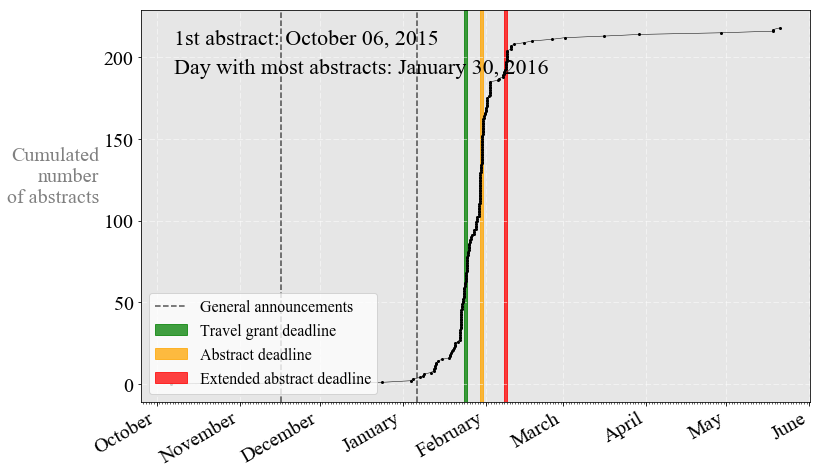

In [20]:
mpl.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(12, 8))
plt.style.use('colloquium.mplstyle')
ax = plt.subplot(111)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(days)

plt.plot(time4plot, range(0, len(time4plot)), 'ko-', ms=2, lw=0.5)

if year == '2016':
    ax.axvline(announcement2, linestyle='--', lw=2, alpha=0.5)
    ax.axvline(announcement3, linestyle='--', lw=2, alpha=0.5, label='General announcements')
    ax.axvspan(deadline_grants, deadline_grantsend, alpha=0.75, color='green', label='Travel grant deadline')
    ax.axvspan(deadline_abstract, deadline_abstractend, alpha=0.75, color='orange', label='Abstract deadline')
    ax.axvspan(deadline_abstract2, deadline_abstract2end, alpha=0.75, color='red', label='Extended abstract deadline')
    leg = plt.legend(loc='lower left', fontsize=16)
    leg.get_frame().set_facecolor('w')

plt.gcf().autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

plt.ylabel('Cumulated\nnumber\nof abstracts', rotation=0, horizontalalignment='right')

ax.text(.05, .9, '1st abstract: ' + time4plot[0].strftime("%B %d, %Y"),
        horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
ax.text(.05, .825, 'Day with most abstracts: ' + day_mostabstracts,
        horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
plt.grid()
#plt.savefig(figname, dpi=300)
plt.show()
plt.close()

## Count number of abstract per day

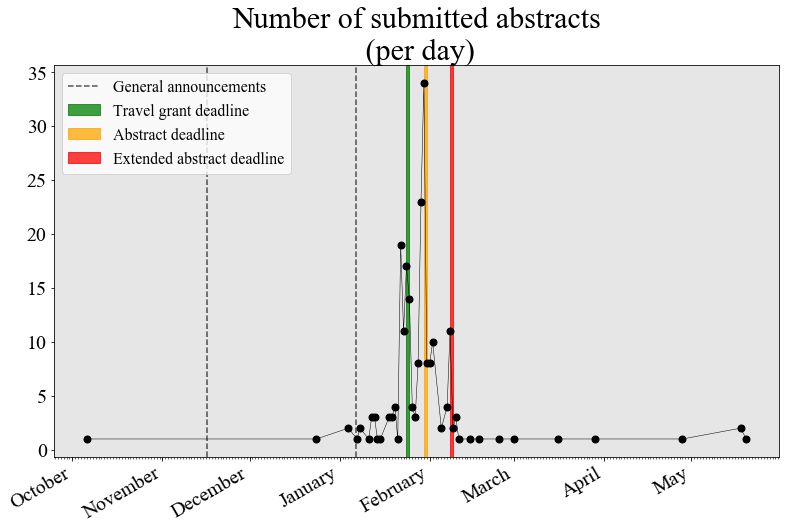

In [48]:
abstractCount = Counter(time4plot2)
labels, values = zip(*abstractCount.items())
fig = plt.figure(figsize=(13, 8))
ax = plt.subplot(111)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(days)
ax.axvline(announcement2, linestyle='--', lw=2, alpha=0.5)
ax.axvline(announcement3, linestyle='--', lw=2, alpha=0.5, label='General announcements')
ax.axvspan(deadline_grants, deadline_grantsend, alpha=0.75, color='green', label='Travel grant deadline')
ax.axvspan(deadline_abstract, deadline_abstractend, alpha=0.75, color='orange', label='Abstract deadline')
ax.axvspan(deadline_abstract2, deadline_abstract2end, alpha=0.75, color='red', label='Extended abstract deadline')
leg = plt.legend(loc='upper left', fontsize=16)
leg.get_frame().set_facecolor('w')
plt.plot(labels, values, 'ko-', linewidth=.5)
plt.gcf().autofmt_xdate()
plt.title("Number of submitted abstracts\n (per day)")
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.show()
plt.close()

In [54]:
print(round(100 * nbefore/ntotal))
print(round(100 * nint/ntotal))
print(round(100 * nlate/ntotal))

58
30
12
